In [111]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img1=np.uint8([250])
img2=np.uint8([10])
img3=cv.add(img1,img2)
print(img3)


[[255]]


对于上面的opencv的add函数，对为uint8的两个图像(这里的img1，img2类似于灰度图像的像素灰度值)，对图像相加的时候，add函数会根据数据类型进行截断。比如uint8，超过上限255就会被自动截断成255。对于图像来说是十分重要的，不然会出现图像失真的现象。一个高灰度值加一个较小的灰度值后，在融合图像中会出现高亮度部分变为黑。下面我就演示下这种情况：

In [112]:
print(img1+img2)

[4]


正如上面的程序输出现实的那样，numpy的加法会对超过uint8的数据进行一次%255的操作。这就是上面说会出现图像失真的核心原因。对于图像的加法来说，显然opencv的add函数的逻辑更符合需求

图像的加法一个用途就是图像的融合。但是图像的融合相较于图像加法多了一个图像的权重的过程。这里需要提醒的是，图像要相加，必须要要求两张图的大小相同。这里先介绍下执行相关操作的函数：

cv2.addWeighted(img1,wei1,img2,wei2)总结来说就是图像+权重的形式

因为很难找到两张大小相同的图片，我们介绍了resize函数后再统一展示

图像缩放:cv2.resize(src[输入图像]，dsize[绝对尺寸],dst[存放数组],fx,fy[在desize=0前提下，分别为x，y的比例因子]，interpolation[插值方法])

因为图像的缩放一定伴随新像素的产生或者旧像素的丢失，上面的插值方式就是如何正确处理新旧像素的方法，目的是让缩放的图像尽可能不失真，丢失细节，接下来重点介绍插值方式：

cv2.INTER_NEAREST（最近邻插值）：通过选取距离目标像素最近的原始像素值作为新像素值，是所有插值方式中计算速度最快的。但由于仅依赖单一邻近像素，放大图像时易产生明显锯齿，缩小图像时可能丢失细节，适用于对速度要求极高、画质要求较低的场景（如实时预览、快速生成缩略图）

cv2.INTER_LINEAR（双线性插值）：基于目标像素周围 4 个原始像素的加权平均计算新值，权重由距离决定。速度中等，输出图像边缘过渡比最近邻插值更平滑，是 OpenCV 缩放的默认方式（尤其适合缩小图像），能在速度与画质间取得较好平衡，满足多数日常图像尺寸调整需求

cv2.INTER_CUBIC（双三次插值）：利用目标像素周围 16 个原始像素，通过三次多项式计算加权值，计算量大于双线性插值，但放大后图像细节更细腻、边缘更平滑，画质更优。适合对图像放大效果要求较高的场景（如高清化处理、图像编辑），但速度相对较慢

cv2.INTER_AREA（区域像素平均）：缩小图像时通过计算原始对应区域的像素平均值生成新像素，能保留更多整体信息，有效避免马赛克和细节丢失；放大时效果接近双线性插值但略逊。是图像缩小场景的最优选择，尤其适合需要保留纹理细节的下采样需求

cv2.INTER_LANCZOS4（兰索斯插值）：基于兰索斯窗函数，使用目标像素周围 8×8 区域的像素进行高阶计算，是所有方式中计算最慢的，但无论放大还是缩小，都能最大限度保留细节并平衡边缘锐度，画质最优。适用于医学图像、高精度图像缩放等对画质要求极高的专业场景

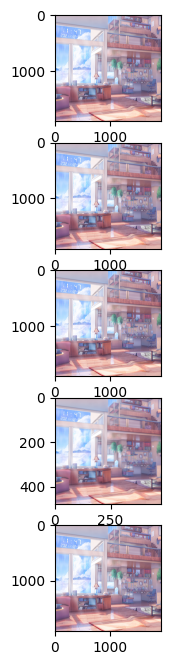

In [113]:
img=cv.imread("D:\image\preview.jpg")
def show(img):
    plt.imshow(img[:,:,::-1])
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(10,8),dpi=100)
image_nearest=cv.resize(img,dsize=None,fx=2,fy=2,interpolation=cv.INTER_NEAREST)
image_linear=cv.resize(img,dsize=None,fx=2,fy=2,interpolation=cv.INTER_LINEAR)
image_cubic=cv.resize(img,dsize=None,fx=2,fy=2,interpolation=cv.INTER_CUBIC)
image_area=cv.resize(img,dsize=None,fx=0.5,fy=0.5,interpolation=cv.INTER_AREA)
image_lanczos=cv.resize(img,dsize=None,fx=2,fy=2,interpolation=cv.INTER_LANCZOS4)
axes[0].imshow(image_nearest[:,:,::-1])
axes[1].imshow(image_linear[:,:,::-1])
axes[2].imshow(image_cubic[:,:,::-1])
axes[3].imshow(image_area[:,:,::-1])
axes[4].imshow(image_lanczos[:,:,::-1])



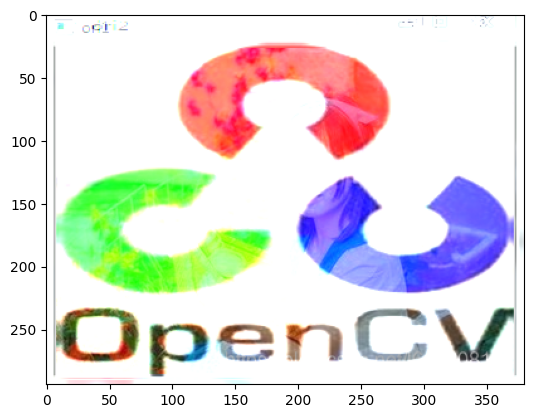

In [114]:
img_1=cv.imread('D:\image\image1.png')
img_2=cv.imread('D:\image\image2.png')
h,w=img_1.shape[:2]
img_2_e=cv.resize(img_2,dsize=(w,h),interpolation=cv.INTER_CUBIC)
img_end=cv.addWeighted(img_1,0.7,img_2_e,1,0)
plt.imshow(img_end[:,:,::-1])


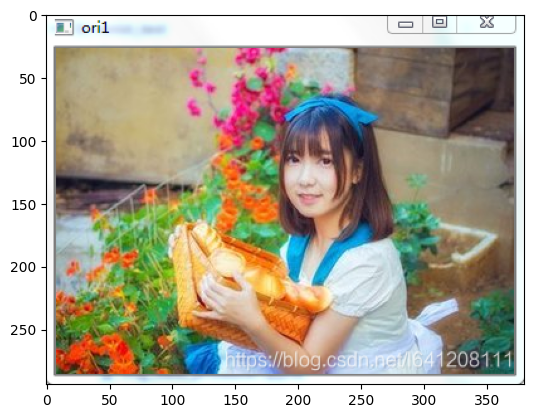

In [115]:
plt.imshow(img_1[:,:,::-1])


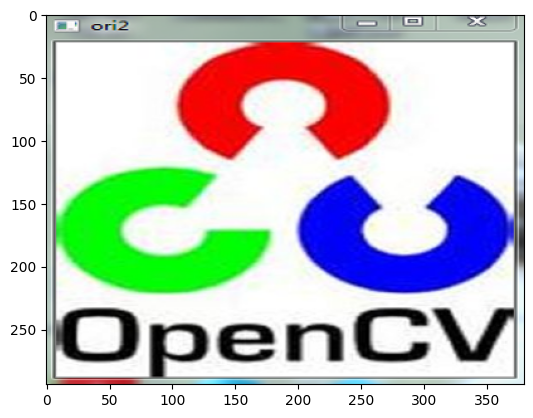

In [116]:
plt.imshow(img_2_e[:,:,::-1])

以上两张是原图片